## PCA plot

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.stats.multitest as smt
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D

In [ ]:
# Load the provided differential expression data
diff_df = pd.read_csv("20210514_diff_all_CellLines.csv")
diff_df.head()

In [ ]:
# Filter based on given criteria
diff_df_sel = diff_df[(diff_df['adj.pvalue'] < 0.05) &
                      (abs(diff_df['log2FC']) > 0.5) &
                      (diff_df['cond_mod'] != "Day 9_Day 2")]
diff_df_sel.head()

In [ ]:
norm_glob_df_sum_wide.head()

In [ ]:
#Slicefirst row of the dataframe
norm_glob_df_sum_wide.iloc[0]

In [73]:
#Explort the dataframe to csv
norm_glob_df_sum_wide.to_csv("norm_glob_df_sum_wide.csv")

In [ ]:
#read the csv file
norm_glob_df_sum_wide_2 = pd.read_csv("norm_glob_df_sum_wide.csv")
norm_glob_df_sum_wide_2.head()

In [6]:
# Select relevant proteins for the heatmap
diff_df_hm = norm_glob_df_sum_wide_2.set_index('Uniprot_ID')

# Heatmap pipeline

1) No cluster

In [ ]:
# Hierarchical clustering
# Import the necessary packages
from scipy.cluster import hierarchy
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(diff_df_hm)

# Perform hierarchical clustering
linked = linkage(scaled_data, method='average')

# Get the order of rows according to the clustering
dendro = dendrogram(linked, no_plot=True)
order = dendro['leaves']

# Reorder the rows based on the clustering
clustered_data = diff_df_hm.iloc[order]

#drop cluster from clustered_data
#clustered_data = clustered_data.drop(columns="Cluster")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(clustered_data, cmap='viridis', yticklabels=False)
plt.title('Clustered Heatmap of Differential Expression Data')
plt.show()


In [ ]:
#Heatmap of the data
plt.figure(figsize=(10, 8))
sns.heatmap(diff_df_hm_sorted, cmap="Blues", cbar_kws={'label': 'Normalized Abundance'})
plt.title("Heatmap of Normalized Abundance Values")
plt.xlabel("BioReplicate")
plt.ylabel("Protein")
plt.show()

2) Both cluster: all

In [ ]:
import seaborn as sns

# Using clustermap to visualize your data
sns.clustermap(clustered_data, method='average', cmap='viridis', figsize=(10, 10)) #yticklabels= True will show all the values
plt.title('Clustermap of diff_df_hm')
plt.show()

Too many hits; lets set a cutoff based on quantile

In [11]:
#import KMeans
from sklearn.cluster import KMeans

# Perform k-means clustering on the filtered proteins
kclus = KMeans(n_clusters=4, random_state=123).fit(diff_df_hm)

# Add cluster labels to the data
diff_df_hm['Cluster'] = kclus.labels_

# Sort proteins based on cluster labels
diff_df_hm_sorted = diff_df_hm.sort_values(by='Cluster')

# Only the top clusters
threshold = clustered_data.quantile(0.9).max()
filtered_data = clustered_data[clustered_data.gt(threshold).any(axis=1)]

c:\Users\aubhi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
g= sns.clustermap(filtered_data, method='average', cmap='viridis', figsize=(30, 30), yticklabels=True)
plt.title('Clustermap with Threshold Applied')
plt.show()

# Adjust the font size of y-tick labels
#plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=0.5)
#plt.title('Clustermap with Adjusted Font Size')
#plt.show()

2) Both cluster: threshold

In [ ]:
# Only the top clusters
threshold_95 = clustered_data.quantile(0.95).max()
filtered_data_95 = clustered_data[clustered_data.gt(threshold_95).any(axis=1)]
sns.clustermap(filtered_data_95, method='average', cmap='viridis', figsize=(30, 30), yticklabels=True)
plt.title('Clustermap with Threshold Applied')
plt.show()

3) Only row clusters

In [ ]:
# Generate the clustermap with row clustering only
sns.clustermap(filtered_data_95, method='average', cmap='RdBu_r', figsize=(30, 30), yticklabels=True, col_cluster=False)

# Adjust the font size of y-tick labels if needed
plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=8)

plt.title('Clustermap with Row Clustering Only')
plt.show()


4) only row cluetered with column Normalization

In [ ]:
# Column normalize the data (z-score normalization)
normalized_data = (filtered_data - filtered_data.mean()) / filtered_data.std()

# Generate the clustermap with row clustering only and the specified colormap
g = sns.clustermap(normalized_data, method='average', cmap='RdBu_r', figsize=(30, 30), yticklabels=True, col_cluster=False)

# Adjust the font size of y-tick labels
plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=8)

plt.title('Clustermap with Column Normalization and RdBu_r Colormap')
plt.show()


5) Row clustered with column normalization

In [ ]:
# Column normalize the data (z-score normalization)
normalized_data_all = (clustered_data - clustered_data.mean()) / clustered_data.std()

# Generate the clustermap with row clustering only and the specified colormap
g = sns.clustermap(normalized_data_all, method='average', cmap='RdBu_r', figsize=(30, 30), yticklabels=True, col_cluster=False)

# Adjust the font size of y-tick labels
plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=8)

plt.title('Clustermap with Column Normalization and RdBu_r Colormap')
plt.show()


6) only row cluetered with row Normalization

In [ ]:
# Column normalize the data (z-score normalization)
column_normalized_data = (clustered_data - clustered_data.mean()) / clustered_data.std()

# Row normalize the data
row_normalized_data = (column_normalized_data.T - column_normalized_data.T.mean()) / column_normalized_data.T.std()
row_normalized_data = row_normalized_data.T

# Generate the clustermap with row clustering only and the specified colormap
g = sns.clustermap(normalized_data_all, method='average', cmap='RdBu_r', figsize=(30, 30), yticklabels=True, col_cluster=False)

# Adjust the font size of y-tick labels
plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=8)

plt.title('Clustermap with Column Normalization and RdBu_r Colormap')
plt.show()

Heatmaps with genes cutoff at the first

In [28]:
row_normalized_data.head()

,DMSO_H1975_1,DMSO_H1975_2,DMSO_H1975_3,DMSO_H2228_1,DMSO_H2228_2,DMSO_H2228_3,DMSO_H23_1,DMSO_H23_2,DMSO_H23_3,DMSO_H3122_1,...,d9_H23_3,d9_H3122_1,d9_H3122_2,d9_H3122_3,d9_H358_1,d9_H358_2,d9_H358_3,d9_PC9_1,d9_PC9_2,d9_PC9_3
Uniprot_ID,,,,,,,,,,,,,,,,,,,,,
O15305,0.593988,0.540144,0.580098,0.278260,0.298653,0.234658,-0.656023,-0.985377,-0.646039,-1.725072,...,-1.273111,-1.294288,-2.032813,-1.311550,0.975734,1.034597,1.005559,0.935088,0.922582,0.965168
P07910,1.307021,0.751120,0.652434,-0.629724,-0.661890,-0.464132,-1.367595,-1.539696,-1.298084,-0.593399,...,-1.467301,0.814724,0.845942,0.133651,-1.241931,-0.097494,-0.145840,0.693961,0.925263,1.425181
P07900,1.532983,-0.513564,-0.528036,0.475971,0.249425,0.392712,-1.854151,-1.084414,-1.233452,1.523925,...,-1.843916,1.274256,0.106270,1.239733,-0.920864,0.848939,0.237211,-0.210903,-0.073131,0.040789
P11940,1.034084,1.879126,1.765217,1.190865,0.736756,0.986250,0.506631,0.586899,0.366208,1.557927,...,0.060031,0.245736,0.332087,0.005062,-3.523679,-1.407036,-1.628802,-1.292025,-1.425506,-1.306278
P62937,-0.132275,-0.201773,-0.330205,1.404038,1.053534,1.318507,-1.540699,-1.016608,-1.060786,0.349179,...,-1.852010,0.826021,-0.379333,0.707502,-1.690757,-1.382140,-0.440377,-0.261977,-0.569036,0.254743


In [ ]:
# Split the data into the three conditions
DMSO_data = row_normalized_data.iloc[:, 0:9]
D2_data = row_normalized_data.iloc[:, 9:18]
D9_data = row_normalized_data.iloc[:, 18:27]

# Calculate the standard deviation for each gene across each condition
DMSO_std = DMSO_data.std(axis=1)
D2_std = D2_data.std(axis=1)
D9_std = D9_data.std(axis=1)

# Sum the standard deviations across the three conditions for each gene
total_std = DMSO_std + D2_std + D9_std

# Rank the genes based on this summed standard deviation
most_differential_genes = total_std.sort_values(ascending=False)

# Display the top genes that are most differential
top_genes = most_differential_genes.head(200)
top_genes

In [30]:
top_genes.shape

(200,)

7) (Top 200 most differentiated genes; 3 cohort) row normalized, row clustered

In [ ]:
# Filter the row_normalized_data to only include top differential genes
top_genes_data = row_normalized_data.loc[top_genes.index]

# Generate the heatmap for these genes
g = sns.clustermap(top_genes_data, method='average', cmap='RdBu_r', figsize=(20, 20), yticklabels=True, col_cluster=False)

# Adjust the font size of y-tick labels if needed
plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=8)

plt.title('Clustermap of Top Differential Genes')
plt.show()


8) (Top 600 most S2N differentiated 2 cohort) row normalized and clustered

In [ ]:
# Split the data into the three conditions
Ctrl_data = row_normalized_data.iloc[:, 0:9]
Treated_data = row_normalized_data.iloc[:, 9:27]

# Calculate the standard deviation for each gene across each condition
Ctrl_std = Ctrl_data.std(axis=1)
Treated_std = Treated_data.std(axis=1)

# Sum the standard deviations across the three conditions for each gene
total_std_2 = Ctrl_std + Treated_std

# Rank the genes based on this summed standard deviation
most_differential_genes_2 = total_std_2.sort_values(ascending=False)

# Display the top genes that are most differential
top_genes_2 = most_differential_genes_2.head(600)
top_genes_2

In [ ]:
# Filter the row_normalized_data to only include top differential genes
top_genes_data_2 = row_normalized_data.loc[top_genes_2.index]

# Generate the heatmap for these genes
g = sns.clustermap(top_genes_data_2, method='average', cmap='RdBu_r', figsize=(30, 30), yticklabels=True, col_cluster=False)

# Adjust the font size of y-tick labels if needed
plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=8)

plt.title('Clustermap of Top Differential Genes')
plt.show()

9) Top 20% genes (high in DMSO lo in others) and (low in DMSO high in others)

In [ ]:
# Calculate mean expression for each gene in DMSO and other columns
DMSO_mean = Ctrl_data.mean(axis=1)
Others_mean = Treated_data.mean(axis=1)

# Genes high in DMSO and low in the others
high_DMSO_low_others = row_normalized_data[(DMSO_mean > Others_mean)]

# Genes low in DMSO and high in the others
low_DMSO_high_others = row_normalized_data[(DMSO_mean < Others_mean)]

# Print the genes that satisfy the conditions
print("Genes high in DMSO and low in the others:")
print(high_DMSO_low_others.index)

print("\nGenes low in DMSO and high in the others:")
print(low_DMSO_high_others.index)


In [ ]:
# Calculate the difference in means for each gene
mean_difference = DMSO_mean - Others_mean

# Determine the count for the top 20%
count_20_percent = int(0.20 * len(mean_difference))

# Genes high in DMSO and low in the others (top 20%)
top_high_DMSO = mean_difference.nlargest(count_20_percent).index

# Genes low in DMSO and high in the others (top 20%)
top_low_DMSO = mean_difference.nsmallest(count_20_percent).index

# Filter the row_normalized_data for these genes
high_DMSO_data = row_normalized_data.loc[top_high_DMSO]
low_DMSO_data = row_normalized_data.loc[top_low_DMSO]

# Concatenate the two cohorts to create a combined dataset for visualization
combined_data = pd.concat([high_DMSO_data, low_DMSO_data])

# Code structure for visualization:
g = sns.clustermap(combined_data, method='average', cmap='RdBu_r', figsize=(10, 15), yticklabels=True, col_cluster=False)

# Adjust the font size of y-tick labels if needed
plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=8)

plt.title('Clustermap of Top 20% Differential Genes')
plt.show()

9) Most differentiated genes name imported

In [ ]:
# load the cluster_df
clust_df = pd.read_csv("clust_df_updated.csv")
clust_df.head()

In [ ]:
# Split the 'Gene Names' column based on spaces and explode the lists into individual rows
clust_df_exploded = clust_df.assign(Gene_Names=clust_df['Gene Names'].str.split(' ')).explode('Gene_Names')

# Drop the original 'Gene Names' column
clust_df_exploded = clust_df_exploded.drop(columns='Gene Names')

# Display the first few rows of the exploded DataFrame
clust_df_exploded.head()

In [41]:
# Merge combined_data with clust_df_exploded using Uniprot_ID as key
combined_data_gene_name = combined_data.merge(clust_df_exploded, left_index=True, right_on='Uniprot_ID')

In [ ]:
combined_data_gene_name.head()

10) (Top ratio differentiated genes) row normalized and clustered

In [ ]:
# Calculate the fold change (avoiding division by zero)
# Adding a small constant to the denominator to avoid division by zero
small_constant = 1e-10
fold_change = DMSO_mean / (Others_mean + small_constant)

# Rank genes based on absolute fold change
ranked_genes = fold_change.abs().sort_values(ascending=False)

# Select top 20% of genes
top_20_percent_genes = ranked_genes.head(int(0.20 * len(ranked_genes)))

# Extract these genes from the row_normalized_data
selected_genes_data = row_normalized_data.loc[top_20_percent_genes.index]

# Code structure for visualization:
g = sns.clustermap(selected_genes_data, method='average', cmap='RdBu_r', figsize=(10, 15), yticklabels=True, col_cluster=False)
plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=8)
plt.title('Clustermap of Top 20% Genes Based on Fold Change')
plt.show()


# Generating volcano plot 

In [ ]:
# Import the file norm_glob_df_sum_wide.xlsx
idmapping_norm_glob_df_sum_wide = pd.read_excel("norm_glob_df_sum_wide.xlsx")
idmapping_norm_glob_df_sum_wide.head()

In [56]:
idmapping_norm_glob_df_sum_wide.shape

(1833, 56)

In [ ]:
# Exploding the 'Gene Names' column
idmapping_norm_glob_df_sum_wide_exploded = idmapping_norm_glob_df_sum_wide.assign(Gene_Names=idmapping_norm_glob_df_sum_wide['Gene Names'].str.split(' ')).explode('Gene_Names')
idmapping_norm_glob_df_sum_wide_exploded.head()

In [ ]:
# Delete the gene names column and uniprot id column and save it as a new dataframe
idmapping_norm_glob_df_sum_wide_exploded_2 = idmapping_norm_glob_df_sum_wide_exploded.drop(columns=['Gene Names', 'Uniprot_ID'])

# Make Gene_names as index
idmapping_norm_glob_df_sum_wide_exploded_2 = idmapping_norm_glob_df_sum_wide_exploded_2.set_index('Gene_Names')
idmapping_norm_glob_df_sum_wide_exploded_2.head()

In [51]:
# Export the dataframe to csv
idmapping_norm_glob_df_sum_wide_exploded_2.to_csv("idmapping_norm_glob_df_sum_wide_exploded_dataframe.csv")

In [ ]:
# Import the file idmapping_norm_glob_df_sum_wide_exploded_dataframe.csv
idmapping_norm_glob_df_sum_wide_exploded_dataframe = pd.read_csv("idmapping_norm_glob_df_sum_wide_exploded_dataframe.csv")
idmapping_norm_glob_df_sum_wide_exploded_dataframe.head()

In [6]:
import scipy.stats as stats

In [7]:
cell_lines = ['PC9', 'H358', 'H1975', 'H2228', 'H23', 'H3122']
df = idmapping_norm_glob_df_sum_wide_exploded_dataframe

def compute_statistics(df, cell_line):
    control_columns = [f'DMSO_{cell_line}_{i}' for i in range(1, 4)]
    treatment_columns = [f'd9_{cell_line}_{i}' for i in range(1, 4)]

    # Calculate fold change
    fold_change = df[treatment_columns].mean(axis=1) / df[control_columns].mean(axis=1)
    
    # Calculate p-values using t-test, ensuring only numeric values are passed
    p_values = df.apply(lambda row: 
                        stats.ttest_ind(
                            [x for x in row[control_columns] if pd.to_numeric(x, errors='coerce') is not np.nan],
                            [x for x in row[treatment_columns] if pd.to_numeric(x, errors='coerce') is not np.nan]
                        )[1] if all(pd.to_numeric(row[control_columns + treatment_columns], errors='coerce').notna()) else np.nan,
                        axis=1)

    return fold_change, p_values


In [ ]:
df

In [ ]:
# copy
df_2 = idmapping_norm_glob_df_sum_wide_exploded_dataframe.copy()
df.set_index('Gene_Names', inplace=True)
df

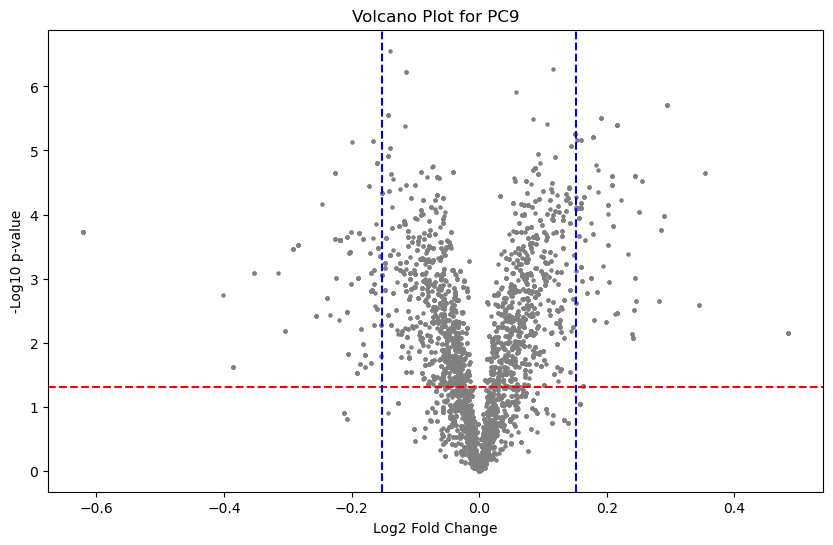

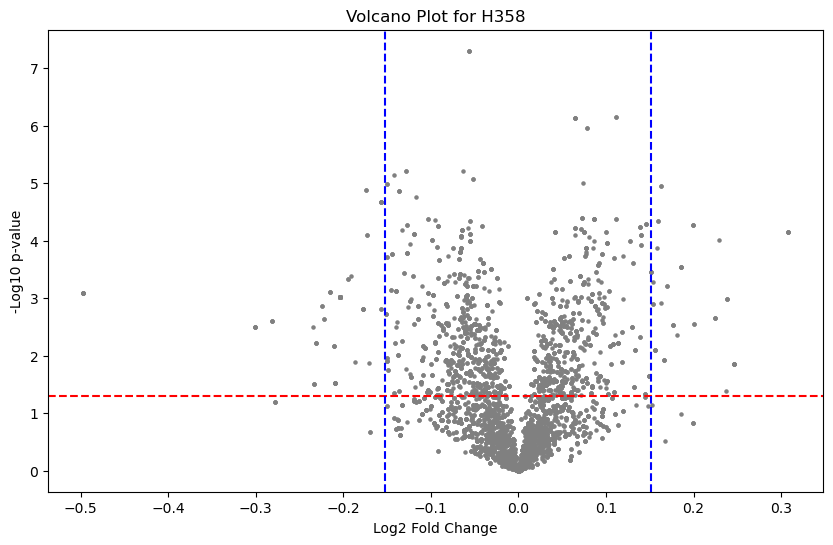

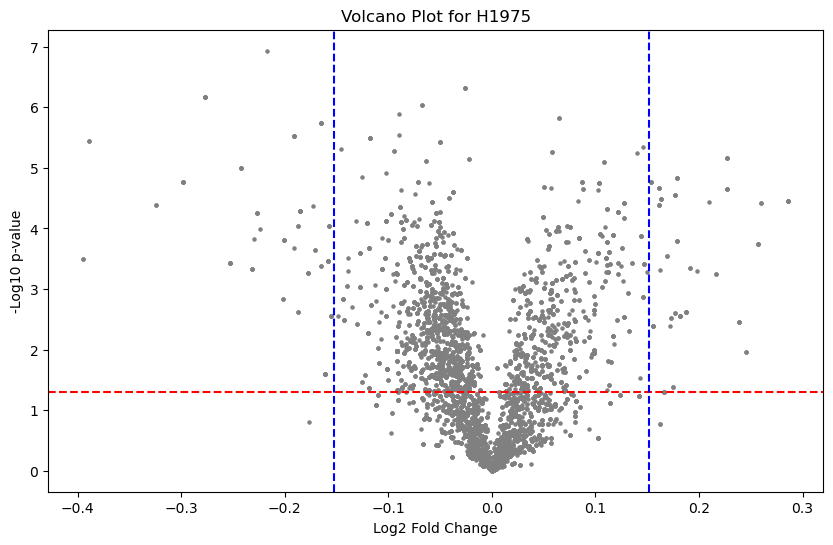

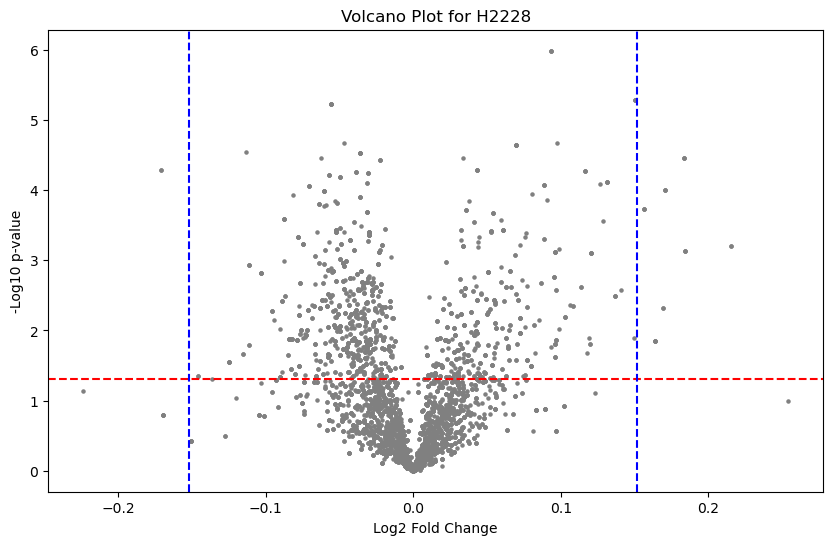

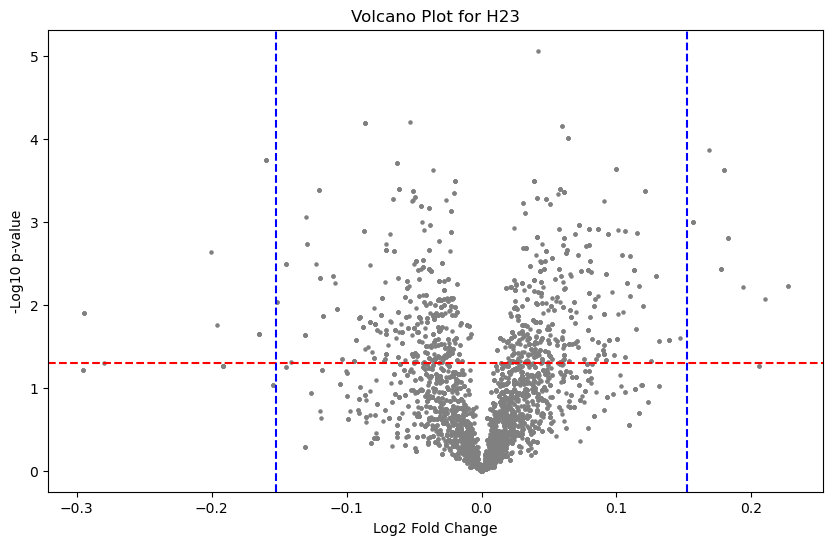

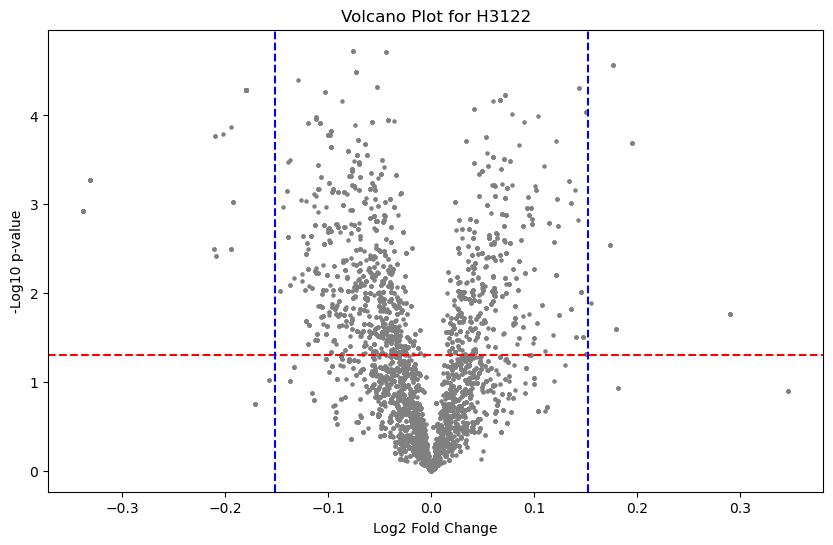

In [10]:
def plot_volcano(fold_change, p_values, cell_line):
    # Calculate log2 fold change and -log10 p-values
    log2_fc = np.log2(fold_change)
    neg_log10_pvalues = -np.log10(p_values)

    plt.figure(figsize=(10, 6))
    plt.scatter(log2_fc, neg_log10_pvalues, c='gray', s=5)
    plt.title(f'Volcano Plot for {cell_line}')
    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-Log10 p-value')
    plt.axhline(y=-np.log10(0.05), color='red', linestyle='--')
    plt.axvline(x=np.log2(0.9), color='blue', linestyle='--')
    plt.axvline(x=-np.log2(0.9), color='blue', linestyle='--')
    plt.show()

# Use the functions to compute statistics and plot for each cell line
for cell_line in cell_lines:
    fold_change, p_values = compute_statistics(df, cell_line)
    plot_volcano(fold_change, p_values, cell_line)

In [ ]:
from adjustText import adjust_text

def plot_volcano_with_adjusted_text(fold_change, p_values, df, cell_line):
    # Calculate log2 fold change and -log10 p-values
    log2_fc = np.log2(fold_change)
    neg_log10_pvalues = -np.log10(p_values)

    plt.figure(figsize=(12, 8))

    # Plot all points
    plt.scatter(log2_fc, neg_log10_pvalues, c='gray', s=5)

    # Filter for significant genes based on both fold change and p-value thresholds
    significant_indices = ((log2_fc < np.log2(0.8)) | (log2_fc > -np.log2(0.8))) & (p_values < 0.05)

    # Highlight significant points
    plt.scatter(log2_fc[significant_indices], neg_log10_pvalues[significant_indices], c='red', s=5)

    plt.title(f'Volcano Plot for {cell_line}')
    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-Log10 p-value')
    plt.axhline(y=-np.log10(0.05), color='red', linestyle='--')
    plt.axvline(x=np.log2(0.8), color='blue', linestyle='--')
    plt.axvline(x=-np.log2(0.8), color='blue', linestyle='--')
    
    # Gather positions and labels for significant genes
    texts = []
    for gene, fc, p_val in zip(df['Gene_Names'][significant_indices], log2_fc[significant_indices], neg_log10_pvalues[significant_indices]):
        texts.append(plt.text(fc, p_val, gene))
    
    if texts:
        # Adjust text positions to avoid overlap
        adjust_text(texts, arrowprops=dict(arrowstyle='-', color='k'))

    plt.show()

# Example usage
for cell_line in cell_lines:
    fold_change, p_values = compute_statistics(df_2, cell_line)
    plot_volcano_with_adjusted_text(fold_change, p_values, df_2, cell_line)


Significant indices in a dataframe

In [ ]:
import pandas as pd

def get_significant_indices_for_all_cell_lines(cell_lines, df):
    # Create an empty DataFrame to store results
    significant_indices_df = pd.DataFrame(columns=['Cell_Line', 'Gene_Name', 'Fold_Change', 'P_Value'])

    for cell_line in cell_lines:
        # Compute statistics for each cell line
        fold_change, p_values = compute_statistics(df, cell_line)

        # Calculate log2 fold change and -log10 p-values
        log2_fc = np.log2(fold_change)
        neg_log10_pvalues = -np.log10(p_values)

        # Filter for significant genes based on both fold change and p-value thresholds
        significant = ((log2_fc < np.log2(0.9)) | (log2_fc > -np.log2(0.9))) & (p_values < 0.05)
        significant_genes = df['Gene_Names'][significant]

        # Add the significant genes to the DataFrame
        for index in significant_genes.index:
            gene = significant_genes[index]
            significant_indices_df = significant_indices_df.append({
                'Cell_Line': cell_line,
                'Gene_Name': gene,
                'Fold_Change': fold_change[index],
                'P_Value': p_values[index]
            }, ignore_index=True)

    return significant_indices_df

# Example usage
significant_indices_df = get_significant_indices_for_all_cell_lines(cell_lines, df_2)

In [36]:
significant_indices_df.shape

(815, 4)

In [ ]:
significant_indices_df.sort_values(by='Fold_Change', ascending=False)

In [ ]:
significant_indices_df

In [40]:
significant_indices_df.to_csv("significant_indices_df.csv")

GSEA

In [54]:
import gseapy as gp
# Get the list of available Enrichr libraries
available_libraries = gp.get_library_name()
print(available_libraries) ## Define the path to the gene set file (e.g., .gmt file)
#gene_set_file = 'path_to_gene_set_file.gmt'


['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_CRISPR_GeneDependency_CellLines_2023', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and_Tissue_2021', 'Diabetes_Perturbations_GEO_202

In [ ]:
import gseapy as gp

# Assuming 'significant_indices_df' has columns 'Gene_Name' and 'Fold_Change'
gene_list = significant_indices_df.sort_values('Fold_Change', ascending=False)['Gene_Name'].tolist()

# Define the library name
library_name = 'CORUM'  # Correct library name from the list

# Run GSEA using Enrichr
enr = gp.enrichr(gene_list=gene_list,
                 gene_sets=library_name,
                 outdir='gsea',
                 cutoff=0.05)  # Adjust cutoff as needed

# Visualize the results
enr_results = enr.results
print(enr_results.head())


Each cell line separately: both positive and negative together

In [68]:
import pandas as pd
import gseapy as gp

# List of cell lines to analyze
cell_lines = ['PC9', 'H358', 'H1975', 'H2228', 'H23', 'H3122']  # Update with your cell lines

# Define the library name
library_name = 'CORUM'  # Replace with a valid library name from the list

# Minimum number of genes required to run GSEA
min_genes = 10  # Adjust this number based on your requirements

# List to store GSEA results DataFrames
gsea_results_df = []

for cell_line in cell_lines:
    # Filter the DataFrame for the current cell line
    df_line = significant_indices_df[significant_indices_df['Cell_Line'] == cell_line]

    # Sort genes by fold change and convert to list
    gene_list = df_line.sort_values('Fold_Change', ascending=False)['Gene_Name'].tolist()

    # Check if gene list is empty or too short
    if not gene_list or len(gene_list) < min_genes:
        print(f"Gene list for {cell_line} is empty or too short for GSEA.")
        continue

    try:
        # Run GSEA using Enrichr
        enr = gp.enrichr(gene_list=gene_list,
                         gene_sets=library_name,
                         outdir=f'gsea/{cell_line}',
                         cutoff=0.05)  # Adjust cutoff as needed

        # Get results as DataFrame
        enr_df = enr.results
        enr_df['Cell_Line'] = cell_line  # Add a column for the cell line
        gsea_results_df.append(enr_df)
    except Exception as e:
        print(f"Error running GSEA for {cell_line}: {e}")

# Combine all results into a single DataFrame
if gsea_results_df:
    all_gsea_results = pd.concat(gsea_results_df, ignore_index=True)
else:
    print("No GSEA results were generated.")

# Optionally, you can save the results to a file
# all_gsea_results.to_csv('gsea_results_cell_lines.csv', index=False)

c:\Users\aubhi\anaconda3\lib\site-packages\gseapy\enrichr.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
c:\Users\aubhi\anaconda3\lib\site-packages\gseapy\enrichr.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
c:\Users\aubhi\anaconda3\lib\site-packages\gseapy\enrichr.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
c:\Users\aubhi\anaconda3\lib\site-packages\gseapy\enrichr.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self

In [ ]:
all_gsea_results.head()

Network

Each cell line separately: positive and negative separated (up or down)

In [70]:
import pandas as pd
import gseapy as gp

# Define the cell lines to analyze
cell_lines = ['PC9', 'H358', 'H1975', 'H2228', 'H23', 'H3122']  # Update with your cell lines

# Define the library name
library_name = 'CORUM'  # Replace with a valid library name from the list

# Minimum number of genes required to run GSEA
min_genes = 10  # Adjust this number based on your requirements

# List to store GSEA results DataFrames
gsea_results_df = []

for cell_line in cell_lines:
    # Filter the DataFrame for the current cell line
    df_line = significant_indices_df[significant_indices_df['Cell_Line'] == cell_line]

    # Separate upregulated and downregulated genes
    upregulated_genes = df_line[df_line['Fold_Change'] > 1].sort_values('Fold_Change', ascending=False)['Gene_Name'].tolist()
    downregulated_genes = df_line[df_line['Fold_Change'] < 1].sort_values('Fold_Change')['Gene_Name'].tolist()

    # Define a dictionary to map the gene subsets
    gene_subsets = {'upregulated': upregulated_genes, 'downregulated': downregulated_genes}

    for subset_name, gene_list in gene_subsets.items():
        # Check if gene list is empty or too short
        if not gene_list or len(gene_list) < min_genes:
            print(f"Gene list for {cell_line} ({subset_name}) is empty or too short for GSEA.")
            continue

        try:
            # Run GSEA using Enrichr
            enr = gp.enrichr(gene_list=gene_list,
                             gene_sets=library_name,
                             outdir=f'gsea/{cell_line}_{subset_name}',
                             cutoff=0.05)  # Adjust cutoff as needed

            # Get results as DataFrame
            enr_df = enr.results
            enr_df['Cell_Line'] = cell_line
            enr_df['Subset'] = subset_name  # Add a column for the subset (upregulated/downregulated)
            gsea_results_df.append(enr_df)
        except Exception as e:
            print(f"Error running GSEA for {cell_line} ({subset_name}): {e}")

# Combine all results into a single DataFrame
if gsea_results_df:
    all_gsea_results = pd.concat(gsea_results_df, ignore_index=True)
else:
    print("No GSEA results were generated.")

# Optionally, you can save the results to a file
# all_gsea_results.to_csv('gsea_results_cell_lines_up_down.csv', index=False)


c:\Users\aubhi\anaconda3\lib\site-packages\gseapy\enrichr.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2023-11-21 03:09:52,690 Warning: No enrich terms using library CORUM when cutoff = 0.05
c:\Users\aubhi\anaconda3\lib\site-packages\gseapy\enrichr.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
c:\Users\aubhi\anaconda3\lib\site-packages\gseapy\enrichr.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
c:\Users\aubhi\anaconda3\lib\site-packages\gseapy\enrichr.py:173: FutureWarning: The frame.append method is deprecated and will be r

Gene list for H2228 (downregulated) is empty or too short for GSEA.


c:\Users\aubhi\anaconda3\lib\site-packages\gseapy\enrichr.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
c:\Users\aubhi\anaconda3\lib\site-packages\gseapy\enrichr.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
c:\Users\aubhi\anaconda3\lib\site-packages\gseapy\enrichr.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
c:\Users\aubhi\anaconda3\lib\site-packages\gseapy\enrichr.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self

In [ ]:
all_gsea_results.head()

Network analysis

In [74]:
import networkx as nx
import matplotlib.pyplot as plt
import requests

upregulated_genes = df_line[df_line['Fold_Change'] > 1].sort_values('Fold_Change', ascending=False)['Gene_Name'].tolist()
downregulated_genes = df_line[df_line['Fold_Change'] < 1].sort_values('Fold_Change')['Gene_Name'].tolist()

In [75]:
def get_string_interactions(gene_list):
    base_url = "https://string-db.org/api"
    output_format = "json"
    method = "network"
    
    request_url = f"{base_url}/{output_format}/{method}"
    params = {
        "identifiers": "%0d".join(gene_list),
        "species": 9606,  # For Homo sapiens
        "limit": 100
    }
    
    response = requests.post(request_url, data=params)
    return response.json()

# Fetch interactions for the identified DEGs
up_interactions = get_string_interactions(upregulated_genes)
down_interactions = get_string_interactions(downregulated_genes)

In [ ]:
def create_network(gene_list):
    # Retrieve interactions
    interactions = get_string_interactions(gene_list)

    # Create a network graph
    G = nx.Graph()
    for gene in gene_list:
        G.add_node(gene)
    G.add_edges_from(interactions)

    return G

def plot_network(G):
    # Plot the network
    plt.figure(figsize=(12, 12))
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray')
    plt.title("Gene Interaction Network")
    plt.show()


# Create and plot network for upregulated genes
G_up = create_network(upregulated_genes)
plot_network(G_up)

# Create and plot network for downregulated genes
G_down = create_network(downregulated_genes)
plot_network(G_down)


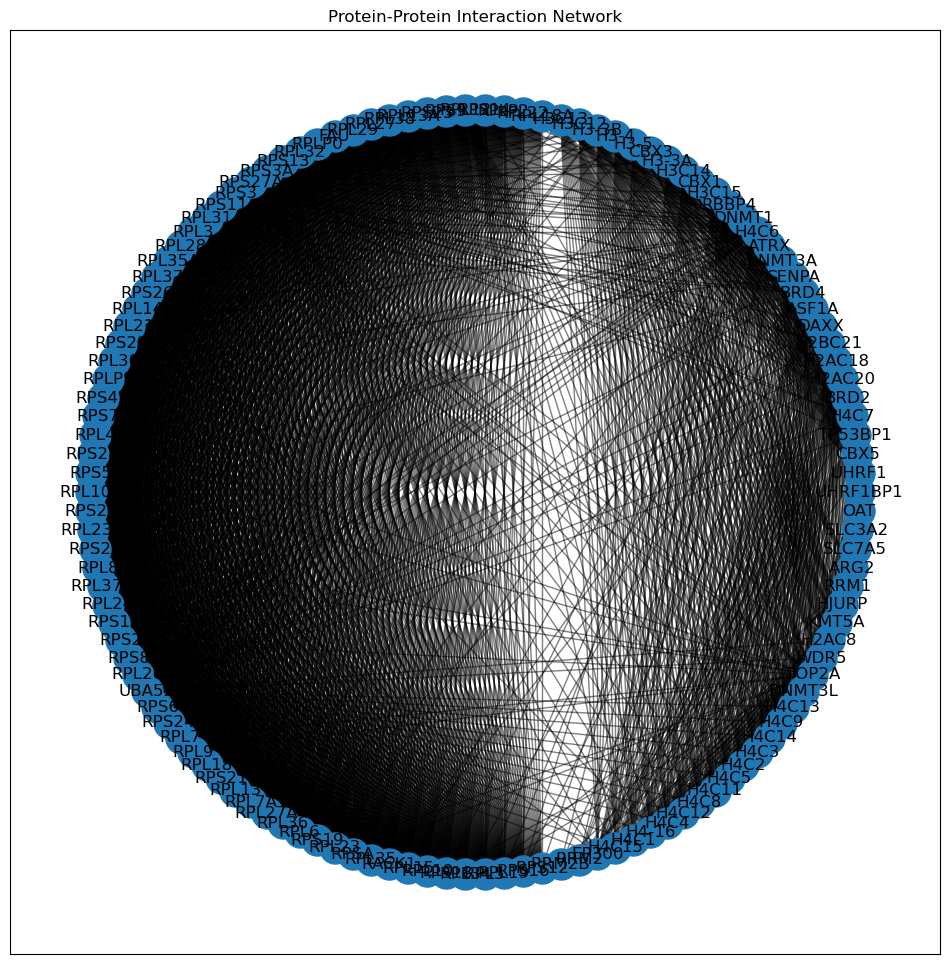

In [79]:
def create_network_with_interaction(interactions):
    G = nx.Graph()
    
    for interaction in interactions:
        node_a = interaction['preferredName_A']
        node_b = interaction['preferredName_B']
        score = interaction['score']
        
        G.add_edge(node_a, node_b, weight=score)
    
    return G

# Create a network graph from the interaction data
G1 = create_network_with_interaction(up_interactions)
G2 = create_network_with_interaction(down_interactions)

# Draw the network
plt.figure(figsize=(12,12))
pos = nx.circular_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12)
plt.title("Protein-Protein Interaction Network")
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def create_network_with_interaction(interactions):
    G = nx.Graph()
    
    for interaction in interactions:
        node_a = interaction['preferredName_A']
        node_b = interaction['preferredName_B']
        score = interaction['score']
        
        G.add_edge(node_a, node_b, weight=score)
    
    return G

# Assuming up_interactions and down_interactions are defined and contain your interaction data
G1 = create_network_with_interaction(up_interactions)
G2 = create_network_with_interaction(down_interactions)

# Draw the network for upregulated genes
plt.figure(figsize=(12, 12))
pos1 = nx.spring_layout(G1)  # positions for all nodes in G1
nx.draw_networkx_nodes(G1, pos1, node_size=500)
nx.draw_networkx_edges(G1, pos1, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G1, pos1, font_size=12)
plt.title("Protein-Protein Interaction Network - Upregulated Genes")
plt.show()

# Draw the network for downregulated genes
plt.figure(figsize=(12, 12))
pos2 = nx.spring_layout(G2)  # positions for all nodes in G2
nx.draw_networkx_nodes(G2, pos2, node_size=500)
nx.draw_networkx_edges(G2, pos2, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G2, pos2, font_size=12)
plt.title("Protein-Protein Interaction Network - Downregulated Genes")
plt.show()


Generating network for each cell line separately

In [85]:
# Import significant_indices_df.xlsx
PC9_nx = pd.read_excel("significant_indices_df.xlsx", sheet_name= 'PC9')
H1975_nx = pd.read_excel("significant_indices_df.xlsx", sheet_name= 'H1975')
H358_nx = pd.read_excel("significant_indices_df.xlsx", sheet_name= 'H358')
H23_nx = pd.read_excel("significant_indices_df.xlsx", sheet_name= 'H23')
H228_nx = pd.read_excel("significant_indices_df.xlsx", sheet_name= 'H228')
H3122_nx = pd.read_excel("significant_indices_df.xlsx", sheet_name= 'H3122')

In [ ]:
print(PC9_nx.head())
print(H1975_nx.head())
print(H358_nx.head())
print(H23_nx.head())
print(H228_nx.head())
print(H3122_nx.head())

In [87]:
# Fetch interactions for the identified DEGs
PC9_interactions = get_string_interactions(PC9_nx['Gene_Name'].tolist())
H1975_interactions = get_string_interactions(H1975_nx['Gene_Name'].tolist())
H358_interactions = get_string_interactions(H358_nx['Gene_Name'].tolist())
H23_interactions = get_string_interactions(H23_nx['Gene_Name'].tolist())
H228_interactions = get_string_interactions(H228_nx['Gene_Name'].tolist())
H3122_interactions = get_string_interactions(H3122_nx['Gene_Name'].tolist())


In [ ]:
# Assuming up_interactions and down_interactions are defined and contain your interaction data
G1 = create_network_with_interaction(PC9_interactions)
G2 = create_network_with_interaction(H1975_interactions)
G3 = create_network_with_interaction(H358_interactions)
G4 = create_network_with_interaction(H23_interactions)
G5 = create_network_with_interaction(H228_interactions)
G6 = create_network_with_interaction(H3122_interactions)

# Draw the network for PC9
plt.figure(figsize=(12, 12))
pos1 = nx.spring_layout(G1)  # positions for all nodes in G1
nx.draw_networkx_nodes(G1, pos1, node_size=500)
nx.draw_networkx_edges(G1, pos1, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G1, pos1, font_size=12)
plt.title("Protein-Protein Interaction Network - PC9")
plt.show()

# Draw the network for H1975
plt.figure(figsize=(12, 12))
pos2 = nx.spring_layout(G2)  # positions for all nodes in G2
nx.draw_networkx_nodes(G2, pos2, node_size=500)
nx.draw_networkx_edges(G2, pos2, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G2, pos2, font_size=12)
plt.title("Protein-Protein Interaction Network - H1975")
plt.show()

# Draw the network for H358
plt.figure(figsize=(12, 12))
pos3 = nx.spring_layout(G3)  # positions for all nodes in G3
nx.draw_networkx_nodes(G3, pos3, node_size=500)
nx.draw_networkx_edges(G3, pos3, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G3, pos3, font_size=12)
plt.title("Protein-Protein Interaction Network - H358")
plt.show()

# Draw the network for H23
plt.figure(figsize=(12, 12))
pos4 = nx.spring_layout(G4)  # positions for all nodes in G4
nx.draw_networkx_nodes(G4, pos4, node_size=500)
nx.draw_networkx_edges(G4, pos4, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G4, pos4, font_size=12)
plt.title("Protein-Protein Interaction Network - H23")
plt.show()

# Draw the network for H228
plt.figure(figsize=(12, 12))
pos5 = nx.spring_layout(G5)  # positions for all nodes in G5
nx.draw_networkx_nodes(G5, pos5, node_size=500)
nx.draw_networkx_edges(G5, pos5, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G5, pos5, font_size=12)
plt.title("Protein-Protein Interaction Network - H228")
plt.show()

# Draw the network for H3122
plt.figure(figsize=(12, 12))
pos6 = nx.spring_layout(G6)  # positions for all nodes in G6
nx.draw_networkx_nodes(G6, pos6, node_size=500)
nx.draw_networkx_edges(G6, pos6, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G6, pos6, font_size=12)
plt.title("Protein-Protein Interaction Network - H3122")
plt.show()


In [89]:
#Exporting the networks in cytoscpae compatible format
# List of your networks
networks = [G1, G2, G3, G4, G5, G6]

for i, G in enumerate(networks, start=1):
    # For nodes
    node_data = {
        "NodeID": [],
        "Label": [],  # Add more attributes if you have
        # "Attribute1": [],
        # "Attribute2": [],
    }

    for node in G.nodes(data=True):
        node_data["NodeID"].append(node[0])
        node_data["Label"].append(node[1].get('label', 'DefaultLabel'))  # Replace 'label' with your attribute key
        # node_data["Attribute1"].append(node[1].get('attribute1', 'DefaultValue'))
        # node_data["Attribute2"].append(node[1].get('attribute2', 'DefaultValue'))

    node_df = pd.DataFrame(node_data)
    node_df.to_csv(f'nodes_G{i}.csv', index=False)

    # For edges
    edge_data = {
        "Source": [],
        "Target": [],
        "Weight": [],  # Add more attributes if you have
        # "Type": [],
    }

    for edge in G.edges(data=True):
        edge_data["Source"].append(edge[0])
        edge_data["Target"].append(edge[1])
        edge_data["Weight"].append(edge[2].get('weight', 1.0))  # Replace 'weight' with your attribute key
        # edge_data["Type"].append(edge[2].get('type', 'DefaultType'))

    edge_df = pd.DataFrame(edge_data)
    edge_df.to_csv(f'edges_G{i}.csv', index=False)

Now in each cell lines separating by up and down regulated proteins

In [96]:
# Splitting each cell line DataFrame into upregulated and downregulated subsets
PC9_up_nx = PC9_nx[PC9_nx['Fold_Change'] > 1]
PC9_down_nx = PC9_nx[PC9_nx['Fold_Change'] < 1]

H1975_up_nx = H1975_nx[H1975_nx['Fold_Change'] > 1]
H1975_down_nx = H1975_nx[H1975_nx['Fold_Change'] < 1]

H358_up_nx = H358_nx[H358_nx['Fold_Change'] > 1]
H358_down_nx = H358_nx[H358_nx['Fold_Change'] < 1]

H23_up_nx = H23_nx[H23_nx['Fold_Change'] > 1]
H23_down_nx = H23_nx[H23_nx['Fold_Change'] < 1]

H228_up_nx = H228_nx[H228_nx['Fold_Change'] > 1]
H228_down_nx = H228_nx[H228_nx['Fold_Change'] < 1]

H3122_up_nx = H3122_nx[H3122_nx['Fold_Change'] > 1]
H3122_down_nx = H3122_nx[H3122_nx['Fold_Change'] < 1]


In [97]:
# List of cell lines and their corresponding up/down dataframes
cell_lines_data = [
    ('PC9', PC9_up_nx, PC9_down_nx),
    ('H1975', H1975_up_nx, H1975_down_nx),
    ('H358', H358_up_nx, H358_down_nx),
    ('H23', H23_up_nx, H23_down_nx),
    ('H228', H228_up_nx, H228_down_nx),
    ('H3122', H3122_up_nx, H3122_down_nx)
]

# Dictionary to store interactions
interactions = {}

for cell_line, up_df, down_df in cell_lines_data:
    up_interactions = get_string_interactions(up_df['Gene_Name'].tolist())
    down_interactions = get_string_interactions(down_df['Gene_Name'].tolist())

    interactions[f'{cell_line}_up'] = up_interactions
    interactions[f'{cell_line}_down'] = down_interactions

# Now interactions dictionary should have the interaction data for each cell line, both up and down

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

graph_titles = {
    'PC9_up': "Protein-Protein Interaction Network - PC9 (Upregulated)",
    'PC9_down': "Protein-Protein Interaction Network - PC9 (Downregulated)",
    'H1975_up': "Protein-Protein Interaction Network - H1975 (Upregulated)",
    'H1975_down': "Protein-Protein Interaction Network - H1975 (Downregulated)",
    'H358_up': "Protein-Protein Interaction Network - H358 (Upregulated)",
    'H358_down': "Protein-Protein Interaction Network - H358 (Downregulated)",
    'H23_up': "Protein-Protein Interaction Network - H23 (Upregulated)",
    'H23_down': "Protein-Protein Interaction Network - H23 (Downregulated)",
    #'H2228_up': "Protein-Protein Interaction Network - H2228 (Upregulated)",
    #'H2228_down': "Protein-Protein Interaction Network - H2228 (Downregulated)",
    'H3122_up': "Protein-Protein Interaction Network - H3122 (Upregulated)",
    'H3122_down': "Protein-Protein Interaction Network - H3122 (Downregulated)"
}


# Create and visualize networks for each set of interactions
for key, title in graph_titles.items():
    # Create the network graph
    G = create_network_with_interaction(interactions[key])

    # Draw the network
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw_networkx_nodes(G, pos, node_size=200)  # reduced node size
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=10)  # adjusted font size
    plt.title(title)
    plt.show()


Just show clustering coefficiency and label for the central nodes

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Assuming your graphs are named G1, G2, G3, etc.
graphs = [G1, G2, G3, G4, G5, G6]
# Corresponding cell line names
cell_line = ['PC9', 'H1975', 'H358', 'H23', 'H2228', 'H3122']

# Pair each graph with its cell line name
graph_cell_line_pairs = list(zip(graphs, cell_line))

for G, cell_line_name in graph_cell_line_pairs:
    # Calculate degree centralities
    degree_centralities = nx.degree_centrality(G)
    # Threshold for selecting central nodes, e.g., top 10%
    threshold = sorted(degree_centralities.values(), reverse=True)[int(len(degree_centralities) * 0.1)]

    central_nodes = [node for node, centrality in degree_centralities.items() if centrality >= threshold]

    # Visualization
    pos = nx.spring_layout(G, seed=42)  # You can experiment with different layouts
    plt.figure(figsize=(12, 10))

    # Draw non-central nodes
    nx.draw_networkx_nodes(G, pos, nodelist=set(G) - set(central_nodes), node_color='lightblue', node_size=50)

    # Draw central nodes
    nx.draw_networkx_nodes(G, pos, nodelist=central_nodes, node_color='red', node_size=100)

    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.5)

    # Draw labels for central nodes
    texts = []
    for node in central_nodes:
        texts.append(plt.text(pos[node][0], pos[node][1], node, ha='center', va='center'))

    # Use adjustText to avoid overlap
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))

    plt.title(f"Network with Central Nodes Labeled - {cell_line_name}")
    plt.show()


Now clustering coefficiency for up and down regulated genes

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from adjustText import adjust_text

graph_titles = {
    'PC9_up': "Protein-Protein Interaction Network - PC9 (Upregulated)",
    'PC9_down': "Protein-Protein Interaction Network - PC9 (Downregulated)",
    'H1975_up': "Protein-Protein Interaction Network - H1975 (Upregulated)",
    'H1975_down': "Protein-Protein Interaction Network - H1975 (Downregulated)",
    'H358_up': "Protein-Protein Interaction Network - H358 (Upregulated)",
    'H358_down': "Protein-Protein Interaction Network - H358 (Downregulated)",
    'H23_up': "Protein-Protein Interaction Network - H23 (Upregulated)",
    'H23_down': "Protein-Protein Interaction Network - H23 (Downregulated)",
    #'H2228_up': "Protein-Protein Interaction Network - H2228 (Upregulated)",
    #'H2228_down': "Protein-Protein Interaction Network - H2228 (Downregulated)",
    'H3122_up': "Protein-Protein Interaction Network - H3122 (Upregulated)",
    'H3122_down': "Protein-Protein Interaction Network - H3122 (Downregulated)"
}


for key, title in graph_titles.items():
    # Create the network graph
    G = create_network_with_interaction(interactions[key])

    # Calculate degree centralities
    degree_centralities = nx.degree_centrality(G)
    threshold = sorted(degree_centralities.values(), reverse=True)[int(len(degree_centralities) * 0.1)]
    central_nodes = [node for node, centrality in degree_centralities.items() if centrality >= threshold]

    # Visualization
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, seed=42)

    # Draw non-central nodes
    nx.draw_networkx_nodes(G, pos, nodelist=set(G) - set(central_nodes), node_color='lightblue', node_size=200)

    # Draw central nodes
    nx.draw_networkx_nodes(G, pos, nodelist=central_nodes, node_color='red', node_size=300)

    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.5)

    # Draw labels for central nodes
    texts = []
    for node in central_nodes:
        texts.append(plt.text(pos[node][0], pos[node][1], node, ha='center', va='center'))

    # Use adjustText to avoid overlap
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))

    plt.title(title)
    plt.show()


Volcano plot for each oncogenes

In [ ]:
from scipy import stats
from adjustText import adjust_text

# Define cell line pairs
cell_line_pairs = [('PC9', 'H1975'), ('H358', 'H23'), ('H2228', 'H3122')]

def compute_statistics_for_pairs(df, pair):
    # Averages for each pair of cell lines
    fold_changes = []
    p_values = []

    for cell_line in pair:
        control_columns = [f'DMSO_{cell_line}_{i}' for i in range(1, 4)]
        treatment_columns = [f'd9_{cell_line}_{i}' for i in range(1, 4)]

        # Calculate fold change
        fold_change = df[treatment_columns].mean(axis=1) / df[control_columns].mean(axis=1)
        fold_changes.append(fold_change)
        
        # Calculate p-values
        p_value = df.apply(lambda row: 
                            stats.ttest_ind(
                                [x for x in row[control_columns] if pd.to_numeric(x, errors='coerce') is not np.nan],
                                [x for x in row[treatment_columns] if pd.to_numeric(x, errors='coerce') is not np.nan]
                            )[1] if all(pd.to_numeric(row[control_columns + treatment_columns], errors='coerce').notna()) else np.nan,
                            axis=1)
        p_values.append(p_value)

    # Compute the average fold change and p-value for the cell line pair
    avg_fold_change = np.mean(fold_changes, axis=0)
    avg_p_value = np.mean(p_values, axis=0)

    return avg_fold_change, avg_p_value

# Example usage
for pair in cell_line_pairs:
    fold_change, p_values = compute_statistics_for_pairs(df_2, pair)
    plot_volcano_with_adjusted_text(fold_change, p_values, df_2, f"{pair[0]} & {pair[1]}")


In [ ]:
# Define cell line pairs and their corresponding gene mutation types
cell_line_pairs = {
    'EGFR': ('PC9', 'H1975'),
    'KRAS': ('H358', 'H23'),
    'ALK': ('H2228', 'H3122')
}

def get_significant_indices_for_pairs(df):
    # Create an empty DataFrame to store results
    significant_indices_df = pd.DataFrame(columns=['Mutation_Type', 'Cell_Line_Pair', 'Gene_Name', 'Fold_Change', 'P_Value'])

    for mutation_type, pair in cell_line_pairs.items():
        # Compute statistics for each pair of cell lines
        fold_change, p_values = compute_statistics_for_pairs(df, pair)

        # Calculate log2 fold change and -log10 p-values
        log2_fc = np.log2(fold_change)
        neg_log10_pvalues = -np.log10(p_values)

        # Filter for significant genes based on both fold change and p-value thresholds
        significant = ((log2_fc < np.log2(0.9)) | (log2_fc > -np.log2(0.9))) & (p_values < 0.05)
        significant_genes = df['Gene_Names'][significant]

        # Add the significant genes to the DataFrame
        for index in significant_genes.index:
            gene = significant_genes[index]
            significant_indices_df = significant_indices_df.append({
                'Mutation_Type': mutation_type,
                'Cell_Line_Pair': f'{pair[0]} & {pair[1]}',
                'Gene_Name': gene,
                'Fold_Change': fold_change[index],
                'P_Value': p_values[index]
            }, ignore_index=True)

    return significant_indices_df

# Example usage
significant_indices_df_pairs = get_significant_indices_for_pairs(df_2)


In [49]:
significant_indices_df_pairs.shape

(227, 5)

In [ ]:
significant_indices_df.sort_values(by='Fold_Change', ascending=False)

In [51]:
# Export the dataframe to csv
significant_indices_df_pairs.to_csv("significant_indices_df_pairs.csv")

GSEA

In [ ]:
import gseapy as gp

# Assuming 'significant_indices_df_pairs' has columns 'Gene_Name' and 'Fold_Change'
gene_list_pairs = significant_indices_df_pairs.sort_values('Fold_Change', ascending=False)['Gene_Name'].tolist()

# Define the library name
library_name = 'CORUM'  # Correct library name from the list

# Run GSEA using Enrichr
enr_pair = gp.enrichr(gene_list=gene_list_pairs,
                 gene_sets=library_name,
                 outdir='gsea',
                 cutoff=0.05)  # Adjust cutoff as needed

# Visualize the results
enr_results_pairs = enr_pair.results
print(enr_results_pairs.head())

In [ ]:
import pandas as pd
import gseapy as gp

# Define the pairs you want to analyze
cell_line_pairs = ['EGFR_pair', 'KRAS_pair', 'ALK_pair']  # Update these as per your data

# Define the library name
library_name = 'CORUM'  # Replace with a valid library name from the list

# List to store GSEA results DataFrames
gsea_results_pair_onco_df = []

for pair in cell_line_pairs:
    # Filter the DataFrame for the current pair
    df_pair = significant_indices_df_pairs[significant_indices_df_pairs['Cell_Line_Pair'] == pair]

    # Sort genes by fold change and convert to list
    gene_list_pair_onco = df_pair.sort_values('Fold_Change', ascending=False)['Gene_Name'].tolist()

    # Run GSEA using Enrichr
    enr_pair_onco = gp.enrichr(gene_list=gene_list_pair_onco,
                               gene_sets=library_name,
                               outdir=f'gsea/{pair}',
                               cutoff=0.05)  # Adjust cutoff as needed

    # Get results as DataFrame
    enr_pair_onco_df = enr_pair_onco.results  # This should be enr_pair_onco.results
    enr_pair_onco_df['Cell_Line_Pair'] = pair  # Add a column for the cell line pair
    gsea_results_pair_onco_df.append(enr_pair_onco_df)

# Combine all results into a single DataFrame
all_gsea_results_pair_onco = pd.concat(gsea_results_pair_onco_df, ignore_index=True)

Gene list is too short

# Heatmaps

In [237]:
treatments = ['DMSO', 'd2', 'd9']

In [238]:
# Function to plot heatmap for a specific cell line with 9 columns
def plot_cell_line_heatmap_all_columns(cell_line, data):
    # Extract relevant columns for the cell line
    heatmap_data = data.loc[:, [f'{treatment}_{cell_line}_{i}' for treatment in treatments for i in range(1, 4)]]
    
    plt.figure(figsize=(15, 10))
    sns.heatmap(heatmap_data, cmap="coolwarm", cbar_kws={'label': 'Expression Level'})
    plt.title(f"Gene Expression in {cell_line} (DMSO, d2, d9)")
    plt.show()


In [ ]:
# Plot heatmaps for each cell line
for cell_line in cell_lines:
    plot_cell_line_heatmap_all_columns(cell_line, df_2)

In [ ]:
# Function to plot heatmap for a specific cell line with 9 columns
def plot_cell_line_heatmap_all_columns(cell_line, data):
    # Extract relevant columns for the cell line
    heatmap_data = data.loc[:, [f'{treatment}_{cell_line}_{i}' for treatment in treatments for i in range(1, 4)]]
    
    plt.figure(figsize=(15, 10))
    sns.heatmap(heatmap_data, cmap="coolwarm", cbar_kws={'label': 'Expression Level'})
    sns.clustermap(heatmap_data, method='average', cmap='viridis', figsize=(10, 10))
    plt.title(f"Gene Expression in {cell_line} (DMSO, d2, d9)")
    plt.show()

# Plot heatmaps for each cell line
for cell_line in cell_lines:
    plot_cell_line_heatmap_all_columns(cell_line, df_2)
    

In [ ]:
df

In [ ]:
# Ensure that gene names are the row indices
#df_2.set_index('Gene_Names', inplace=True)

# Function to plot clustered heatmap for a specific cell line with 9 columns
def plot_cell_line_clustered_heatmap(cell_line, data):
    # Extract relevant columns for the cell line
    heatmap_data = data[[f'{treatment}_{cell_line}_{i}' for treatment in treatments for i in range(1, 4)]]
    
    sns.clustermap(heatmap_data, cmap="coolwarm", center=0, figsize=(15, 10), col_cluster=False, yticklabels=True, cbar_kws={'label': 'Expression Level'})
    plt.title(f"Clustered Gene Expression in {cell_line} (DMSO, d2, d9)")
    plt.show()

# Plot clustered heatmaps for each cell line
for cell_line in cell_lines:
    plot_cell_line_clustered_heatmap(cell_line, df)


### Row normalization for contrast

In [ ]:
# Function to plot clustered, row-normalized heatmap for a specific cell line with 9 columns
def plot_cell_line_clustered_normalized_heatmap(cell_line, data):
    # Extract relevant columns for the cell line
    heatmap_data = data[[f'{treatment}_{cell_line}_{i}' for treatment in treatments for i in range(1, 4)]]
    
    # Perform row normalization (Z-score normalization)
    normalized_data = (heatmap_data - heatmap_data.mean(axis=1).values.reshape(-1, 1)) / heatmap_data.std(axis=1).values.reshape(-1, 1)
    
    sns.clustermap(normalized_data, cmap="coolwarm", center=0, figsize=(15, 10), col_cluster=False, yticklabels=True, cbar_kws={'label': 'Z-score'})
    plt.title(f"Row-normalized Clustered Gene Expression in {cell_line} (DMSO, d2, d9)")
    plt.show()

# Plot row-normalized clustered heatmaps for each cell line
for cell_line in cell_lines:
    plot_cell_line_clustered_normalized_heatmap(cell_line, df_2)

# Network

In [248]:
# Calculate fold change and p-values for PC9 cell line
fold_change_pc9, p_values_pc9 = compute_statistics(df_2, "PC9")

# Further adjust thresholds
log2_threshold_further_adjusted = 0.2
p_value_threshold_further_adjusted = 0.2

# Filter genes based on further adjusted thresholds
degs_further_adjusted = df_2['Gene_Names'][(fold_change_pc9.abs().apply(np.log2) > log2_threshold_further_adjusted) & (p_values_pc9 < p_value_threshold_further_adjusted)]

# Display the number of DEGs identified with further adjusted thresholds
num_degs_further_adjusted = len(degs_further_adjusted)
num_degs_further_adjusted


69

In [249]:
import requests

def get_string_interactions(gene_list):
    base_url = "https://string-db.org/api"
    output_format = "json"
    method = "network"
    
    request_url = f"{base_url}/{output_format}/{method}"
    params = {
        "identifiers": "%0d".join(gene_list),
        "species": 9606,  # For Homo sapiens
        "limit": 100
    }
    
    response = requests.post(request_url, data=params)
    return response.json()

# Fetch interactions for the identified DEGs
degs_list = degs_further_adjusted.tolist()
interactions = get_string_interactions(degs_list)



In [250]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
def create_network(interactions):
    G = nx.Graph()
    
    for interaction in interactions:
        node_a = interaction['preferredName_A']
        node_b = interaction['preferredName_B']
        score = interaction['score']
        
        G.add_edge(node_a, node_b, weight=score)
    
    return G

# Create a network graph from the interaction data
G = create_network(interactions)

# Draw the network
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12)
plt.title("Protein-Protein Interaction Network")
plt.show()


In [ ]:
import plotly.graph_objects as go
import networkx as nx

def plot_network_3d(G):
    # Create a 3D spring layout for our graph
    pos = nx.spring_layout(G, dim=3)
    
    # Extract node and edge information
    edge_x = []
    edge_y = []
    edge_z = []
    for edge in G.edges():
        x0, y0, z0 = pos[edge[0]]
        x1, y1, z1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
        edge_z.extend([z0, z1, None])
        
    edge_trace = go.Scatter3d(x=edge_x, y=edge_y, z=edge_z, mode='lines', line=dict(width=0.5, color='#888'))

    node_x = []
    node_y = []
    node_z = []
    node_degree = []
    for node in G.nodes():
        x, y, z = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_z.append(z)
        node_degree.append(G.degree[node])  # Extract the degree of the node

    node_trace = go.Scatter3d(x=node_x, y=node_y, z=node_z, mode='markers', marker=dict(symbol='circle', size=10, color=node_degree, colorscale='Viridis', colorbar=dict(title='Node Degree')))

    # Create the 3D network plot
    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(scene=dict(aspectmode='cube', xaxis_title="X", yaxis_title="Y", zaxis_title="Z"),
                                     margin=dict(t=0, b=0, l=0, r=0)))

    fig.show()

# Visualize the graph using Plotly
plot_network_3d(G)
